In [2]:
import numpy as np
print(np.arctan(3.96/9.18)/np.pi*180)

23.33404127670978


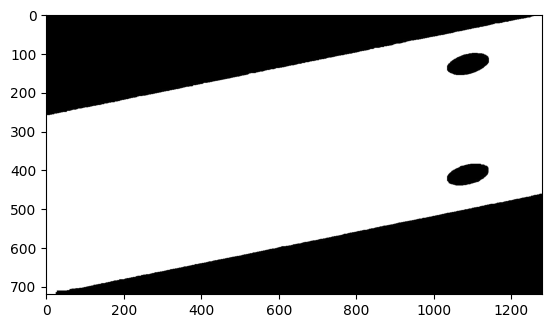

In [3]:
import cv2
image = cv2.imread('../test.jpg')
kernel = np.ones((10,10),np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#show image use plt
import matplotlib.pyplot as plt
plt.imshow(image)


Text(0.5, 1.0, 'Largest Contour')

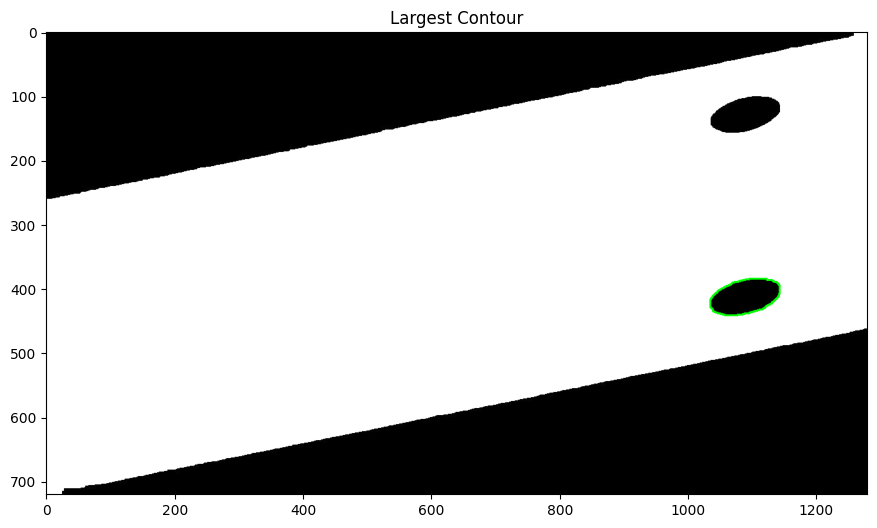

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply thresholding to get binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contour_image = image.copy()
# Find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
contour_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# # Display the image with contours
# plt.figure(figsize=(12, 6))
# plt.imshow(contour_image)
# plt.title("Contours")
# plt.axis("off")
# plt.show()

# 将轮廓按照面积大小进行排序
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# 画出最大的轮廓
contour_image = image.copy()
cv2.drawContours(contour_image, [contours[2]], -1, (0, 255, 0), 2)
plt.figure(figsize=(12, 6))
plt.imshow(contour_image)
plt.title("Largest Contour")


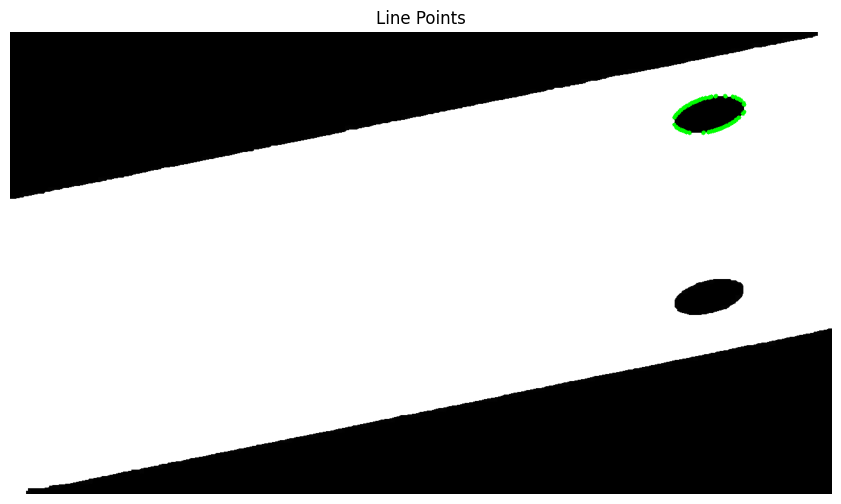

In [5]:
line_points = np.squeeze(np.array(contours[1]))  # [[x, y], ...] -> [x, y]

    # 按 x 坐标排序并选取 [20%-80%] 的点
# line_points = line_points[np.argsort(line_points[:, 0])]
# line_points = line_points[int(len(line_points) * 0.1):int(len(line_points) * 0.9)]

    # 显示点
    # 确保原始图像是彩色的
if len(image.shape) == 2:  # 如果是灰度图像
        line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
else:
        line_image = image.copy()

    # 在图像上绘制选定的点
for point in line_points:
        cv2.circle(line_image, tuple(point), 3, (0, 255, 0), -1)

    # 显示图像
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Line Points")
plt.axis("off")
plt.show()

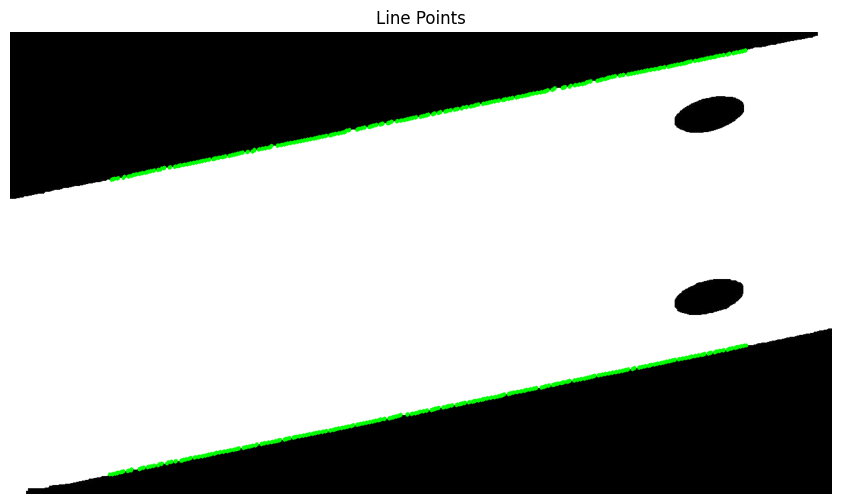

[0.98068103 0.1956137  0.        ]
11.280576677076922


In [6]:
line_points = np.squeeze(np.array(contours[0]))  # [[x, y], ...] -> [x, y]

    # 按 x 坐标排序并选取 [20%-80%] 的点
line_points = line_points[np.argsort(line_points[:, 0])]
line_points = line_points[int(len(line_points) * 0.1):int(len(line_points) * 0.9)]

    # 显示点
    # 确保原始图像是彩色的
if len(image.shape) == 2:  # 如果是灰度图像
        line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
else:
        line_image = image.copy()

    # 在图像上绘制选定的点
for point in line_points:
        cv2.circle(line_image, tuple(point), 3, (0, 255, 0), -1)

    # 显示图像
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Line Points")
plt.axis("off")
plt.show()

# 将点恢复到真实点

# 求解line_points的斜率
x = line_points[:, 0]
y = line_points[:, 1]
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
# print(slope)
vect=np.array([np.sqrt(1 - slope ** 2),-slope,0])
print(vect)
print(np.arctan(vect[1]/vect[0])/np.pi*180)

(160.70460506089415, -305.37205069123513) 427.8808224144329 9032.342919092403 1.5810833969956122


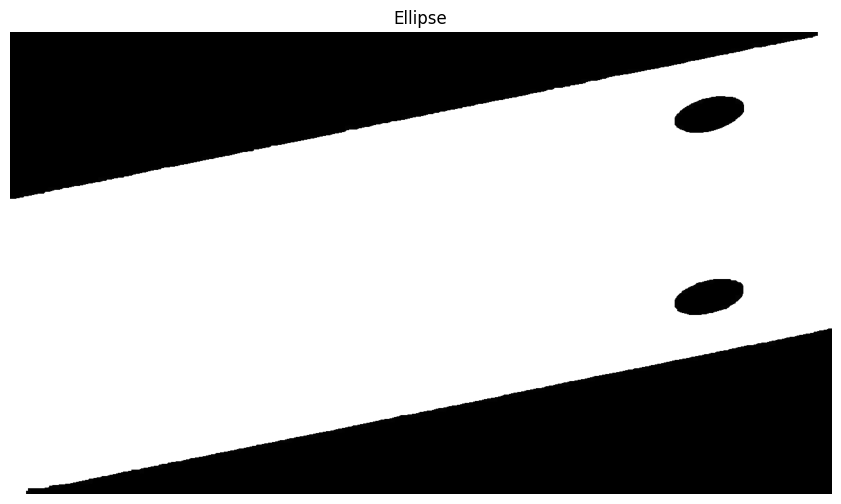

In [7]:
# 拟合椭圆的
# ellipse = cv2.fitEllipse(contours[2])
import sys
import os
import yaml  # 用于加载 YAML 文件

ellipsis1 = np.squeeze(np.array(contours[1])) 
ellipsis2 = np.squeeze(np.array(contours[2])) 

# 直接使用相对路径
project_root = "../"  # 相对于notebook的路径
# 获取绝对路径
absolute_path = os.path.abspath(project_root)
# 添加到 sys.path
if absolute_path not in sys.path:
    sys.path.append(absolute_path)

from algorithm.ellipse.ellipse1 import LsqEllipse
reg = LsqEllipse().fit(ellipsis1)
# print(reg.as_parameters())
center, width, height, phi = reg.as_parameters()
print(center, width, height, phi)


# draw the ellipse on the original image
ellipse_image = image.copy()
# Convert parameters to OpenCV format
center = (int(center[0]), int(center[1]))
axes = (int(width/2), int(height/2))
angle = np.degrees(phi)
cv2.ellipse(ellipse_image, center, axes, angle, 0, 360, (0, 255, 0), 2)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(ellipse_image, cv2.COLOR_BGR2RGB))
plt.title("Ellipse")
plt.axis("off")
plt.show()

In [14]:
axiss=np.array([1,np.tan(18/180*np.pi),0])
# axiss
axiss=axiss/ np.linalg.norm(axiss)
axiss

array([0.95105652, 0.30901699, 0.        ])

: 